## Latentic Semantic Analysis:
## Applied Linear Algebra in Natural Language Understanding

### by Amy Reidy - 21/01/2022

#### Introduction
This project aims to describe how linear algebra can be applied to topic modelling in Natural Language Understanding (NLU). NLU is a subfield of Natural Language Processing (NLP), and the goal of NLU is to use computer algorithms to not just process text data, but to make sense of natural language data as it is spoken and written like a human would (Canonico & De Russis, 2018). NLU has many diverse real-world applications, including voice-controlled assistants like Apple’s Siri, customer service chatbots, and machine translators. NLU is an important subset of machine learning as it allows us to analyse and gain understanding from large bodies of unstructured data. 

Topic modelling is a NLU text-mining technique for extracting topics from text, and it can be used for information retrieval, categorizing documents and exploratory analysis of text datasets. It assumes that documents contain different topics, and these topics are made up of a collection of words. A foundational method of topic modelling is Latent Semantic Analysis (LSA) which is an unsupervised machine learning technique that was introduced by Deerwester et al. (1990) as a way of analysing a text corpus (a large collection of texts) to discover the hidden or latent topics in it. This method differs from traditional NLP as it uses statistical techniques and linear algebra to analyse text, rather than relying on any specification of rules or dictionaries, and it is based on the principle of distributional hypothesis - words that have similar meanings occur in analogous segments of text. 

There are two main steps in conducting LSA: 
1.	Construction of a term-document matrix.
2.	Dimensionality reduction of this matrix using Singular Value Decomposition (SVD). This process produces a topic-document matrix and a topic-term matrix. 


We will begin by importing all necessary libraries.

In [1]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corresponding cell.
%matplotlib inline  
sns.set(style='whitegrid',color_codes=True) 

# importing preprocessing libraries
import nltk
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer  
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# setting stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# function to perform truncated SVD
from sklearn.decomposition import TruncatedSVD


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Data
To illustrate each of the steps involved in using LSA to uncover themes across documents, this project will analyse titles and abstracts from ten recent research papers. The papers are all related to ‘anticipatory action’ (an emerging approach to disaster risk reduction), and they were chosen by selecting the first ten results from searching for the keywords “anticipatory action” on Google Scholar and filtering the results for only papers published in 2021.

Let's create variables with the title and abstracts from each of the papers.

In [2]:
# https://www.sciencedirect.com/science/article/pii/S2212096321001042
a1 = "Playing the long game: Anticipatory action based on seasonal forecasts. Acting in advance of floods, drought and cyclones often requires decision-makers to work with weather forecasts. The inherently probabilistic nature of these forecasts can be problematic when deciding whether to act or not. Cost-loss analysis has previously been employed to support forecast based decision-making such as Forecast-based Financing (FbF), providing insight to when an FbF system has ‘potential economic value’ relative to a no-forecast alternative. One well-known limitation of cost-loss analysis is the difficulty of estimating losses (which vary with hazard magnitude and extent, and with the dynamics of population vulnerability and exposure). A less-explored limitation is ignorance of the temporal dynamics (sequencing) of costs and losses. That is, even if the potential economic value of a forecast system is high, the stochastic nature of the atmosphere and the probabilistic nature of forecasts could conspire over the first few forecasts to increase the expense of using the system over the no-forecast alternative. Thus, for a forecast-based action system to demonstrate value, it often needs to be used over a prolonged length of time. However, knowing exactly how long it must be used to guarantee value is unquantified. This presents difficulties to institutions mandated to protect those at risk, who must justify the use of limited funds to act in advance of a potential, but not definite disaster, whilst planning multi-year strategies. Here we show how to determine the period over which decision makers must use forecasts in order to be confident of achieving ‘value’ over a no-forecast alternative. Results show that in the context of seasonal forecasting it is plausible that more than a decade may pass before a FbF system will have some certainty of showing value, and that if a particular user requires an almost-certain guarantee that using a forecast will be better than a no-forecast strategy, they must hold out until a near-perfect forecast system is available. The implication: there is potential value in seasonal forecasts, but to exploit it one must be prepared to play the long game."


# http://repo.floodalliance.net/jspui/handle/44111/4507
a2 = "Understanding the role of anticipatory action in Somalia. Over the past couple of decades, more attention has been paid in the humanitarian sector to the possibility of giving assistance based on the expectation that a crisis is coming, but before humanitarian needs are severe. Under various labels – including anticipatory action, early warning or early response, forecast-based action and livelihood protection – interest is being pushed by organisations such as the Start Network, the International Federation of Red Cross and Red Crescent Societies and the Red Cross Red Crescent Climate Centre, and UN agencies. We prefer to use the term ‘anticipatory action’ because people facing possible crises anticipate and act. The discussion within the aid sector is better if it is not exclusively inward-looking, about the aid, but can instead focus on what everyone – affected farmers, pastoralists, businesses, local and central government, service providers and aid actors – could do with sensible anticipation and forward planning. SPARC has already established a panel of households for regular interviews in Somalia, including Somaliland and Puntland. Because there were forecasts of poor first rains in 2021 in parts of the Horn of Africa, following on from poor second rains in 2020, the risk of a drought crisis was heightened. This opened a window of opportunity for a real-time learning exercise that could be useful for the future design of anticipatory action."

# https://static1.squarespace.com/static/5c9d3c35ab1a62515124d7e9/t/6172ddf9dd6ca1715da361c8/1634917881699/WP_9_22Oct.pdf
a3 = "UN OCHA ANTICIPATORY ACTION. LESSONS FROM THE 2020 SOMALIA PILOT This report looks at key lessons from the UN Office for the Coordination of Humanitarian Affairs (OCHA) first anticipatory action (AA) pilot for drought in Somalia, designed and endorsed in 2019. The framework triggered in June 2020 based on projected food insecurity due to covid-19, locusts and flooding. As the first AA pilot undertaken by OCHA, the experience in Somalia offers crucial lessons and insights. Driving forward a vision for change while listening deeply and integrating perspectives of partners and in-country colleagues represented a significant polarity to manage. Lessons were learned around the need to start by identifying feasible AA interventions, assessing operational readiness and disaster-specific needs, and building the AA plan and trigger from there. The framework did not include a drought specific trigger, which led to ambiguity when the food security-based trigger was reached due to other threats. Findings also pointed to a need for greater clarity on trigger monitoring, scenario, and protocol development. Finally, the study found that partnership with the World Bank offered prospects for expanded funding—but also came with challenges, including differences in institutional readiness for forecast-based action. The study, which was based on a desk review of relevant documents, interviews with global and in-country partners and stakeholders, and observation of select planning and coordination meetings, recommends: establishing a peer review process for AA plans; setting detailed protocols for monitoring the trigger and carrying out step-by-step actions once reached; clarifying decision-making processes during the design phase; developing an intentional approach to support mindset change among key stakeholders; and recognising and responding to how different people cope with systems change."


# https://www.sciencedirect.com/science/article/pii/B9780128194126000110
a4 = "Earth Observations for Anticipatory Action: Case Studies in Hydrometeorological Hazards. The availability of weather and flood forecasts does not ensure that early action will occur, especially at subnational levels where interventions may reduce risk. Further, the relationship between forecasts for a hydrometeorological hazard and the associated impact on people living in areas at risk has not been sufficiently characterized in many locations. Earth observations from satellites and remotely sensed data can aid in bridging the gap between availability of hydrometeorological forecasts and understanding risk. This chapter offers four case studies on the application of Earth observations for anticipatory action across a variety of hydrometeorological hazards. The chapter concludes with recommendations to promote future growth in EO applications for risk and resilience programming and improved anticipatory humanitarian action."

# https://ui.adsabs.harvard.edu/abs/2021EGUGA..2315290V/abstract
a5 = "Balancing permanent and forecast-based action to lessen wind-induced building damage in the Philippines. With a global paradigm shift from post-disaster response aid to anticipatory action, the question on how anticipatory action relates to long-term climate adaptation and often government-led actions towards permanent disaster prevention becomes more relevant. With rising disaster risk, a framework that decision-makers can use to select between preventive and preparedness risk reduction efforts would be most useful. A model originally developed to compare permanent interventions to forecast-based action for floods was applied to wind-induced building damage due to tropical cyclones, focusing on a case study from the Philippines. We made use of a typhoon forecasting model based on the ensemble forecast from EMCWF, and modeled the wind footprint to estimate the wind speed in the case study area. A threshold was defined, similar to how it is done in actual operations by the Philippine Red Cross. If the forecasted typhoon exceeds a pre-set threshold in terms of wind speed, action to strengthen light-weight wooden houses with a Shelter Strengthening Kit (SSK) is taken. SSKs temporarily make these houses more resistant to withstand extreme winds, thereby reducing the impacts. This short term action is compared to a scenario in which lightweight wooden houses are permanently upgraded. Results give actors in humanitarian response, anticipatory action as well as permanent disaster prevention insight into which variables affect this balance. and help policymakers to allocate their scarce budgets in a cost-effective way. The framework, although developed for the Philippines, can also be replicated in other cyclone-prone countries."

# https://www.tandfonline.com/doi/full/10.1080/17565529.2021.1927659
a6 = "Managing multiple hazards: lessons from anticipatory humanitarian action for climate disasters during COVID-19. In the face of climate change, development and humanitarian practitioners increasingly recognize the need to anticipate and manage multiple, concurrent risks. One prominent example of this increasing focus on anticipation is the rapid growth of Forecast-based Financing (FbF), in particular within Red Cross and Red Crescent (RCRC). To evaluate how anticipatory efforts managed multiple compounding risks during the COVID-19 pandemic, we examine how 14 RCRC Societies adapted their Early Action Protocols to COVID-19. Though many National Societies successfully adapted to the onset of the additional hazard of COVID-19, we find that multi-hazard risk management can be improved by: proactively developing guidelines that enable rapid adaptation of existing plans; more flexible funding mechanisms; surge capacity to provide additional human resources; and increasing local capacity and ownership for implementation to ensure supplies, skills, and decision-making authority are available when communication or travel is restricted. These findings align with wider recommendations for improving development, humanitarian, and climate adaptation practice towards local capacity and agency. They also add urgency to broader calls for more flexible disaster financing and more practitioner-oriented investment in climate risk and multi-hazard management."

# https://www.tandfonline.com/doi/full/10.1080/17565529.2021.1984194
a7 = "Mainstreaming forecast based action into national disaster risk management systems: experience from drought risk management in Kenya. Drought and food security crises heighten risks to lives and livelihoods in East Africa. In recent years, a shift towards acting in advance of such events has gained momentum, notably among the humanitarian and development community. This shift is premised on tools that link climate forecasts with pre-agreed actions and funding, known as Forecast-based Action (FbA), or anticipatory action more widely. While FbA approaches have been developed by a number of humanitarian agencies, the key to scaling-up is mainstreaming these approaches into national risk management systems. This paper addresses this gap in the context of drought risk management in Kenya. We analyse Kenya's current drought management system to assess the potential usability of climate forecast information within the existing system, and outline steps towards improved usability of climate information. Further, we note the critical importance of enabling institutions and reliable financing to ensure that information can be consistently used to trigger early action. We discuss the implications of this for scaling-up FbA into national risk management systems."

# https://www.tandfonline.com/doi/abs/10.1080/23340460.2021.1995461
a8 = "The new EU counter-terrorism Agenda: preemptive security through the anticipation of terrorist events. This article argues that the new EU Counter-Terrorism Agenda is based on logics of anticipatory action. Three types of anticipatory action that are central to the development of EU counter-terrorism are identified: preparedness, precaution and preemption. We argue that while the original EU Counter-Terrorism Strategy contained a mixture of these three forms of anticipatory action, the new Counter-Terrorism Agenda places a renewed emphasis on preemptive measures with preparedness given less prominence. The reinforcing of preemptive security practice is most vividly reflected in the CT Agenda's new Anticipate workstream, which emphasises the utility of preemptive computer-based technologies, including Artificial Intelligence and algorithms, as key dimensions of the response to terrorism. The article identifies challenges of transparency and effectiveness that arise when applying computer-based technologies to counter-terrorism, highlighting the importance of regulatory oversight if the EU's commitment to the development of security policies that respect fundamental rights is to be guaranteed."

# https://journals.sagepub.com/doi/full/10.1177/2053951720985557
a9 = "‘It depends on your threat model’: the anticipatory dimensions of resistance to data-driven surveillance. While many forms of data-driven surveillance are now a ‘fact’ of contemporary life amidst datafication, obtaining concrete knowledge of how different institutions exploit data presents an ongoing challenge, requiring the expertise and power to untangle increasingly complex and opaque technological and institutional arrangements. The how and why of potential surveillance are thus wrapped in a form of continuously produced uncertainty. How then, do affected groups and individuals determine how to counter the threats and harms of surveillance? Responding to an interdisciplinary concern with agency amidst datafication, this article explores what I term ‘anticipatory data practices’ – future-oriented practices which provide a concrete anchor and a heuristic for action amidst the persistent uncertainties of life with data. This article traces how anticipatory data practices have emerged within civil society practices concerned with countering the harms of surveillance and data exploitation. The mixed-method empirical analysis of this article draws from 50 interviews with digital security educators and technology developers; participant observation at 12 civil society events between 2016 and 2019 and the textual analysis of 100 security manuals produced by NGOs and grassroots groups."

# http://repo.floodalliance.net/jspui/handle/44111/3950
a10 = "Information in Power- Connecting local responders to the risk information that they need. Anticipatory action is drawing global attention, with the number of actors delivering support to at-risk communities before disasters and crises strike growing in number and size. This work requires whole of society collaboration which involves collective understanding of risks, coordinated triggers and plans (including local capacity to execute this), and prepositioned financing to put plans into action. One of the critical elements of anticipatory action which will determine the quality and scale of this work is our ability to connect at-risk people to appropriate and robust forecast information. Local people have a vested interest in acting early to mitigate disasters and crises, although there is often limited involvement of at-risk communities in early action decision-making processes. At-risk people, as both observers and responders, possess local capacities, expertise, and importantly, the agency to act. However, local responders are often unprepared, lack access to decision-making processes and are disconnected from risk information. Going forward, enabling communities to act ahead of a potential crisis or disaster will require a focus on locally-led anticipatory action that puts at-risk people at the centre of anticipatory action processes and supports the mainstreaming of early action into community-based humanitarian and development projects. Increased participation of at-risk people, together with experiences gained in implementing and mainstreaming anticipatory action, should be capitalised to strengthen public accountability, build political commitment and influence national and international policies in support of an anticipatory approach."

In [3]:
#creating dataframe with the title and abstract from each paper
df = pd.DataFrame()
df["documents"] = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10]

####  Pre-processing
The first step in machine learning NLP tasks is to pre-process the text data to transform it into a suitable input format. Thus, the following steps will be taken to pre-process the raw text using the NLTK library:
- Tokenization - this is the process of separating documents into sentences and sentences into words.
- Removal of punctuation, symbols, numbers and ‘stop words’ (words such as ‘the’, ‘of’, ‘a’ that add little value to the sentence).
- Words were converted to all lowercase.
- Lemmatization - using an English dictionary, this function reduces words down to their root word, for example: ‘slept’, ‘sleeping’ and ‘sleeps’ would all return the value ‘sleep’.

For example, this is a sample sentence from one of the papers used in the project before pre-processing (MacLeod et al., 2021):

“The implication: there is potential value in seasonal forecasts, but to exploit it one must be prepared to play the long game.”

And this is the sentence after it has been pre-processed:

“implication potential value seasonal forecast exploit must prepared play long game”


In [4]:
def clean_text(document):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(document)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text.lower()

df['documents_cleaned_text']=df["documents"].apply(clean_text)

In [5]:
#looking at the dataframe with cleaned data
df

,documents,documents_cleaned_text
0,Playing the long game: Anticipatory action bas...,playing long game anticipatory action based se...
1,Understanding the role of anticipatory action ...,understanding role anticipatory action somalia...
2,UN OCHA ANTICIPATORY ACTION. LESSONS FROM THE ...,ocha anticipatory action lessons from 2020 som...
3,Earth Observations for Anticipatory Action: Ca...,earth observations anticipatory action case st...
4,Balancing permanent and forecast-based action ...,balancing permanent forecast-based action less...
5,Managing multiple hazards: lessons from antici...,managing multiple hazard lesson anticipatory h...
6,Mainstreaming forecast based action into natio...,mainstreaming forecast based action national d...
7,The new EU counter-terrorism Agenda: preemptiv...,counter-terrorism agenda preemptive security a...
8,‘It depends on your threat model’: the anticip...,depends threat model anticipatory dimension re...
9,Information in Power- Connecting local respond...,information power- connecting local responder ...


In [6]:
#looking at example text before pre-processing
print(df.iloc[0][0])

Playing the long game: Anticipatory action based on seasonal forecasts. Acting in advance of floods, drought and cyclones often requires decision-makers to work with weather forecasts. The inherently probabilistic nature of these forecasts can be problematic when deciding whether to act or not. Cost-loss analysis has previously been employed to support forecast based decision-making such as Forecast-based Financing (FbF), providing insight to when an FbF system has ‘potential economic value’ relative to a no-forecast alternative. One well-known limitation of cost-loss analysis is the difficulty of estimating losses (which vary with hazard magnitude and extent, and with the dynamics of population vulnerability and exposure). A less-explored limitation is ignorance of the temporal dynamics (sequencing) of costs and losses. That is, even if the potential economic value of a forecast system is high, the stochastic nature of the atmosphere and the probabilistic nature of forecasts could con

In [7]:
#looking at example text after pre-processing
print(df.iloc[0][1])

playing long game anticipatory action based seasonal forecast acting advance flood drought cyclone often requires decision-makers work weather forecast inherently probabilistic nature forecast problematic deciding whether cost-loss analysis previously employed support forecast based decision-making forecast-based financing providing insight system potential economic value relative no-forecast alternative well-known limitation cost-loss analysis difficulty estimating loss vary hazard magnitude extent dynamic population vulnerability exposure less-explored limitation ignorance temporal dynamic sequencing cost loss that even potential economic value forecast system high stochastic nature atmosphere probabilistic nature forecast could conspire first forecast increase expense using system no-forecast alternative thus forecast-based action system demonstrate value often need used prolonged length time however knowing exactly long must used guarantee value unquantified this present difficulty

#### Document-Term Matrix
The next step is to create a document-term matrix by encoding the words as integers or floating-points in a process called vectorization. There are two common ways to do this using Scikit-Learn: CountVectorizer and TFIDF (Ramos, 2003).

CountVectorizer is a function that uses a Bag of Words (BoW) method to produce a sparse matrix containing word counts per sentence or document; it is called a bag-of-words as it disregards grammar, word order, etc. 

In [8]:
# countvectorizer
count_vectorizer = CountVectorizer(stop_words=stop_words)
count_vect_text = count_vectorizer.fit_transform(df['documents_cleaned_text'])

# Create dataFrame
count_vec_df = pd.DataFrame(count_vect_text.toarray().transpose(),
                   index=count_vectorizer.get_feature_names(), columns=['Doc1', 'Doc2', 'Doc3', 'Doc4', 'Doc5', 'Doc6', 'Doc7', 'Doc8', 'Doc9', 'Doc10'])
count_vec_df.iloc[5:15]

,Doc1,Doc2,Doc3,Doc4,Doc5,Doc6,Doc7,Doc8,Doc9,Doc10
ability,0,0,0,0,0,0,0,0,0,1
access,0,0,0,0,0,0,0,0,0,1
accountability,0,0,0,0,0,0,0,0,0,1
achieving,1,0,0,0,0,0,0,0,0,0
across,0,0,0,1,0,0,0,0,0,0
acting,1,0,0,0,0,0,1,0,0,1
action,2,5,4,4,8,2,5,3,1,8
actor,0,1,0,0,1,0,0,0,0,1
actual,0,0,0,0,1,0,0,0,0,0
adaptation,0,0,0,0,1,2,0,0,0,0


Above is a snapshot of the matrix produced by applying CountVectorizer to the text dataset. We can see that the word ‘action’ occurs in every document, which is not surprising as it was one of the search keywords.

One disadvantage of this method is that it is biased towards the most frequent words, so this project will use the TFIDF method to create a weighted term-document matrix. TFIDF stands for Term Frequency - Inverse Document Frequency. While this method is also based on the frequency of a word in the corpus, it differs from CountVectorizer as it also provides a numerical representation of how important a word is for statistical analysis. TFIDF assumes that words that feature very frequently in a corpus and words that feature very rarely are both not statistically important for finding a pattern, and so it penalizes words that are too abundant or too infrequent. For this project, the parameter ‘tf_max’ was set to 0.9, which meant only the terms that featured in a maximum of 90% of the documents were included in the matrix; this resulted in the original search keywords “anticipatory” and “action” being filtered out. 

In [9]:
# TFIDF method
vectorizer = TfidfVectorizer(stop_words=stop_words, smooth_idf=True, max_df=0.9)
vect_text = vectorizer.fit_transform(df['documents_cleaned_text'])

# Create dataFrame
df2 = pd.DataFrame(vect_text.toarray().transpose(),
                   index=vectorizer.get_feature_names(), columns=['Doc1', 'Doc2', 'Doc3', 'Doc4', 'Doc5', 
                                                                  'Doc6', 'Doc7', 'Doc8', 'Doc9', 'Doc10'])
df2.iloc[5:15]

,Doc1,Doc2,Doc3,Doc4,Doc5,Doc6,Doc7,Doc8,Doc9,Doc10
ability,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.073403
access,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.073403
accountability,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.073403
achieving,0.053176,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
across,0.000000,0.000000,0.0,0.10821,0.000000,0.000000,0.000000,0.0,0.0,0.000000
acting,0.039548,0.000000,0.0,0.00000,0.000000,0.000000,0.061518,0.0,0.0,0.054592
actor,0.000000,0.071329,0.0,0.00000,0.050516,0.000000,0.000000,0.0,0.0,0.054592
actual,0.000000,0.000000,0.0,0.00000,0.067922,0.000000,0.000000,0.0,0.0,0.000000
adaptation,0.000000,0.000000,0.0,0.00000,0.057740,0.132163,0.000000,0.0,0.0,0.000000
adapted,0.000000,0.000000,0.0,0.00000,0.000000,0.155470,0.000000,0.0,0.0,0.000000


Above is a portion of the 638*10 document-term matrix produced by TFIDF that will be used in the next step. Like in the CountVectorizer matrix, the rows correspond to terms and there is a column for each document.

In [10]:
idf = vectorizer.idf_

dd=dict(zip(vectorizer.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)

# the most frequent word and the least frequent word
print(l[0],l[-1])


based wrapped


In [11]:
# all the words arranged by descending frequency
print(l)

['based', 'forecast', 'humanitarian', 'risk', 'disaster', 'agency', 'decision', 'development', 'early', 'need', 'climate', 'drought', 'financing', 'including', 'making', 'people', 'potential', 'security', 'within', 'acting', 'actor', 'also', 'anticipate', 'anticipation', 'approach', 'challenge', 'crisis', 'cross', 'determine', 'ensure', 'event', 'experience', 'first', 'flood', 'focus', 'forward', 'funding', 'future', 'global', 'hazard', 'improved', 'insight', 'institution', 'intervention', 'interview', 'local', 'many', 'national', 'observation', 'often', 'plan', 'planning', 'practice', 'response', 'study', 'support', 'system', 'term', 'towards', 'trigger', 'understanding', '19', '2019', '2020', 'adaptation', 'advance', 'affected', 'africa', 'although', 'among', 'analysis', 'area', 'article', 'attention', 'available', 'better', 'building', 'capacity', 'case', 'central', 'centre', 'change', 'commitment', 'community', 'context', 'cost', 'could', 'counter', 'country', 'covid', 'crescent', 

#### Singular Value Decomposition 
As the term-document matrix is usually extremely high-dimensional, it is very difficult to identify any patterns using this type of matrix. And so, the next step is to lower the rank of the matrix using one of the most common methods of matrix factorization in linear algebra, Singular Value Decomposition (SVD). 

LSA uses a variant of SVD called Truncated SVD to reduce the dimensionality of the term-document matrix to a “semantic” space of low dimensionality by only computing a specific number of topics (this number is chosen by the analyst). It can be difficult to identify the optimal number of topics or themes for a certain corpus of text, but ideally the number of topics is large enough to give a good sense of the recurring themes in the data, but not too large that it ends up overfitting the data and the topics become too specific to individual documents (Deerwester et al., 1990). Accordingly, only 3 topics were chosen for this experiment as the dataset is quite small. 

After the number of topics was chosen, Truncated SVD decomposed the term-by-document matrix into a product of three simpler matrices:

        A=U*S*V^T

where A is the original m x n term-document matrix, U is an m x k term-topic matrix, V is an n x k document-topic matrix, and S is a diagonal k x k matrix of the singular values of A. In this case, m = 638 (# of terms), n = 10 (# of documents), and k = 3 (# of topics). 


In [12]:
lsa_model = TruncatedSVD(n_components=3, algorithm='randomized', n_iter=10, random_state=42)
lsa_top=lsa_model.fit_transform(vect_text)

In [13]:
print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

[[ 0.41486266 -0.04725249  0.47015685]
 [ 0.41774363 -0.00960108 -0.41698396]
 [ 0.38979102  0.05785705 -0.3364617 ]
 [ 0.35717164  0.040832    0.48246946]
 [ 0.33015107  0.02747967  0.38393869]
 [ 0.50826355 -0.0757671  -0.15796908]
 [ 0.62523606 -0.14382017  0.02877384]
 [ 0.11849379  0.71700407 -0.17310373]
 [ 0.1552438   0.71829886  0.12632367]
 [ 0.58752789 -0.15426554 -0.21376062]]
(10, 3)


In [14]:
l=lsa_top[0]
print("Document 1 :")
for i,topic in enumerate(l):
  print("Topic ",i+1," : ",topic*100)

Document 1 :
Topic  1  :  41.486265792489554
Topic  2  :  -4.725249435347587
Topic  3  :  47.015684580685445


In [15]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(3, 683)
[[ 0.08907228  0.00634699  0.01846694 ...  0.01268563  0.00634699
   0.03547964]
 [-0.01524997  0.04769746  0.04369845 ...  0.00171493  0.04769746
  -0.01125439]
 [-0.06135009  0.00907769 -0.01211501 ...  0.02592976  0.00907769
   0.02314417]]


In [16]:
# Document-Topic Matrix
pd.options.display.float_format = '{:,.8f}'.format
topic_encoded_df = pd.DataFrame(lsa_top, columns = ["Topic 1", "Topic 2", "Topic 3"])
topic_encoded_df["Documents"] = ['Doc1', 'Doc2', 'Doc3', 'Doc4', 'Doc5', 'Doc6', 'Doc7', 'Doc8', 'Doc9', 'Doc10']
display(topic_encoded_df[["Documents", "Topic 1", "Topic 2", "Topic 3"]])

,Documents,Topic 1,Topic 2,Topic 3
0,Doc1,0.41486266,-0.04725249,0.47015685
1,Doc2,0.41774363,-0.00960108,-0.41698396
2,Doc3,0.38979102,0.05785705,-0.33646170
3,Doc4,0.35717164,0.04083200,0.48246946
4,Doc5,0.33015107,0.02747967,0.38393869
5,Doc6,0.50826355,-0.07576710,-0.15796908
6,Doc7,0.62523606,-0.14382017,0.02877384
7,Doc8,0.11849379,0.71700407,-0.17310373
8,Doc9,0.15524380,0.71829886,0.12632367
9,Doc10,0.58752789,-0.15426554,-0.21376062


In [17]:
# Features or words used as features 
dictionary = vectorizer.get_feature_names()

# Term-Topic Matrix
encoding_matrix = pd.DataFrame(lsa_model.components_, index = ["topic_1","topic_2", "topic_3"], columns = (dictionary)).T

encoding_matrix[5:15]

,topic_1,topic_2,topic_3
ability,0.02439661,-0.01040415,-0.01560148
access,0.02439661,-0.01040415,-0.01560148
accountability,0.02439661,-0.01040415,-0.01560148
achieving,0.01247980,-0.00230868,0.02485897
across,0.02186407,0.00405968,0.05191119
acting,0.04918497,-0.01758413,0.00864513
actor,0.04443559,-0.00709166,-0.02189270
actual,0.01268563,0.00171493,0.02592976
adaptation,0.04878438,-0.00774276,0.00128355
adapted,0.04470158,-0.01082309,-0.02441986


From the document-topic matrix, it seems that Topic 1 is generally relevant to all documents, although documents 8 and 9 are the least related to it. It is also evident that these two documents are the most related to Topic 2, whereas this topic is not very relevant to the other documents. Furthermore, it appears that documents 8 and 9 are quite like each other, but very different from the rest of the dataset, and further analysis of the dataset could be undertaken by applying cosine similarity to the document vectors (the rows of the document-topic matrix) to evaluate how similar documents are to each other. 

#### Results

In [18]:
# most important words for each topic
vocab = vectorizer.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i+1)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 1: 
risk forecast management system information local climate based crisis disaster 

Topic 2: 
terrorism counter data surveillance article agenda preemptive practice security amidst 

Topic 3: 
forecast hydrometeorological value earth wind case must application availability chapter 



Truncated SVD derived three topics from the term-document matrix, and aboe we can see the top ten words for each topic. Now let's use word clouds to visualize the top thirty words in each topic.

In [19]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index,name):
  imp_words_topic=""
  comp=lsa_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:30]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400, background_color="white",colormap='viridis').generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.savefig(name, format="jpg")
  plt.show()
 

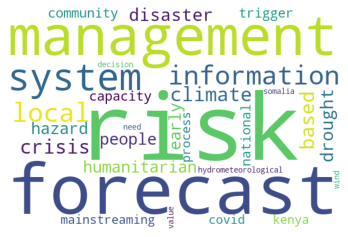

In [20]:
# topic 1
draw_word_cloud(0, "topic_1.jpg")

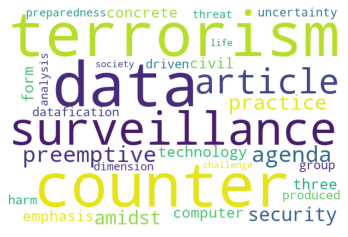

In [21]:
# topic 2
draw_word_cloud(1, "topic_2.jpg")

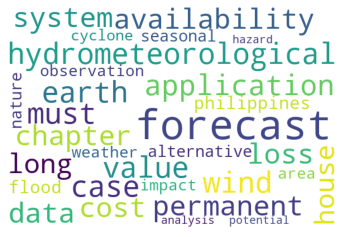

In [22]:
# topic 3
draw_word_cloud(2, "topic_3.jpg")

We can see that Topic 1 contains lots of general and technical terms relating to anticipatory action (including “disaster risk management system” which is a definition of anticipatory action), while Topic 2 focuses on the theme of security and anticipating terrorism, and Topic 3 is more concerned with nature and weather forecasting. 

While there are already some identifiable themes, LSA works best with very large datasets, so more accurate results could be obtained by increasing the number of documents that are analysed. 
 
#### Conclusion
This project shows how linear algebra can be applied to topic modelling through the LSA technique. By using SVD to reduce the noise and dimensionality of a term-document matrix, LSA allows analysts to quickly identify themes across large bodies of text. This was demonstrated by applying LSA to documents comprised of titles and abstracts from ten academic papers, and while this experiment still produced meaningful topics, these results could be further improved by augmenting the text dataset by including more research papers. 
